In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbr
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import numpy as np
import matplotlib
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

Для начало откроем датасет, выведем первые строки

In [2]:
#Let's open csv
data_raw = pd.read_csv('covtype.csv')
data = data_raw.copy()
data.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,552056,3236,163,19,451,-94,426,234,242,130,3311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,387148,3219,79,13,272,-13,1812,237,216,107,1543,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
2,578401,2420,320,7,0,0,1717,201,233,171,242,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,537212,3103,339,26,404,53,3511,156,193,170,1465,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,344414,3177,136,15,247,36,2371,242,233,116,1507,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2


Выведем количество строк и столбцов

In [3]:
#print info about dataset
#number of rows
print('number of rows', data.shape[0])
#number of columns
print('number of columns', data.shape[1])

number of rows 464809
number of columns 56


Определим процент null в строках и столбцах 

In [4]:
#define % nan in rows
(data.isnull().sum(axis = 1)/data.shape[1])*100

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
464804    0.0
464805    0.0
464806    0.0
464807    0.0
464808    0.0
Length: 464809, dtype: float64

In [5]:
# define % nan in columns
(data.isnull().sum()/data.shape[0])*100

Unnamed: 0                            0.0
Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                        

Отметим, что в датасете null отсутсвуют. Это означает, что не нужно очищать датасет от null и заменять их средними значениями, как делалось раньше в лабораторной работе с регрессией
Поскольку классификацию нужно выполнить относительно фичи Cover_Type, посмотрим какие значения она может принимать

In [6]:
print(data['Cover_Type'].unique())

[2 3 1 7 5 6 4]


Посмотрим, какие значения Cover_Type встречаются чаще всего

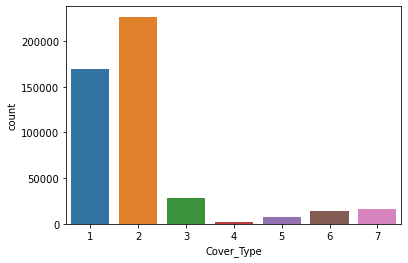

In [7]:
sbr.countplot(data['Cover_Type'],label="Count")
plt.show()

Поскольку нам необходимо найти фичи, от которых Cover_Type будет зависить, построим таблицу корреляции

<AxesSubplot:>

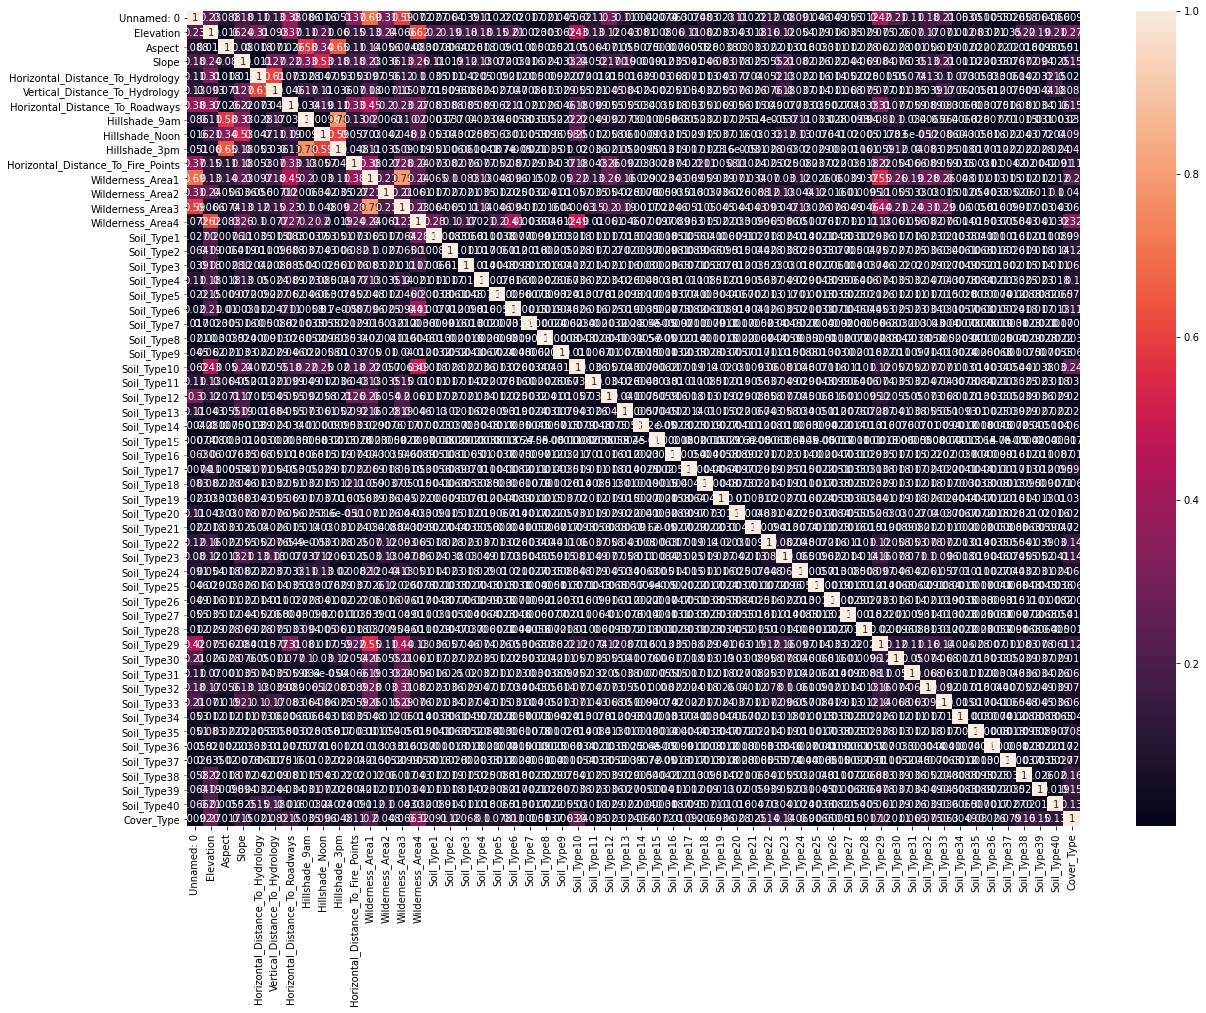

In [8]:
# table of corr
plt.figure(figsize=(20, 15))
M = data.corr().abs()
sbr.heatmap(M, cbar=True, annot=True)

Отметим, что невозможно провести анализ полученных данных: слишком много фич. Поэтому посмотрим корреляцию не в табличном виде

In [9]:
upper_tri = M.where(np.triu(np.ones(M.shape),k=1).astype(np.bool))
print(upper_tri)

                                    Unnamed: 0  Elevation    Aspect     Slope  \
Unnamed: 0                                 NaN   0.231478  0.087503  0.178621   
Elevation                                  NaN        NaN  0.016419  0.242207   
Aspect                                     NaN        NaN       NaN  0.079906   
Slope                                      NaN        NaN       NaN       NaN   
Horizontal_Distance_To_Hydrology           NaN        NaN       NaN       NaN   
Vertical_Distance_To_Hydrology             NaN        NaN       NaN       NaN   
Horizontal_Distance_To_Roadways            NaN        NaN       NaN       NaN   
Hillshade_9am                              NaN        NaN       NaN       NaN   
Hillshade_Noon                             NaN        NaN       NaN       NaN   
Hillshade_3pm                              NaN        NaN       NaN       NaN   
Horizontal_Distance_To_Fire_Points         NaN        NaN       NaN       NaN   
Wilderness_Area1            

Информация относительно Cover_Type расположена в самом низу, так как Cover_Type является последним столбцом в датасете. Отметим, что в данном столбце нет большого коэффицианта от какой-нибудь фичи, максимум равен 0.32. Следовательно, отбирать фичи не имеет большого смысла, поэтому будем в качестве Х будет весь датасет, кроме фичи Cover_Type

In [10]:
X = data.drop(['Cover_Type'],axis=1)
y = data_raw['Cover_Type']

Разделим данные на тренировочные и тестовые

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Применение логистической регрессии

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.7296025059593987


Применение DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9475142638313985


Применение KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9349844668382056


Отметим, что в связи с тем, что коэффициенты корреляции были достаточно малы, фичи не отбирались, поэтому пришлось в качестве Х взять целый датасет. Это влияет на скорость выполнения, больше всего времени занял KNeighborsClassifier, меньше всего - LogisticRegression. Однако при LogisticRegression score равен 0.73, а при KNeighborsClassifier - 0.93. Лучшим образом score равен 0.95 при использовании DecisionTreeClassifier